In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [ ]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

In [ ]:
## check for missing values 
df[df.isnull().any(axis=1)]

In [ ]:
df.loc[:122,"region"]=0
df.loc[122:,"region"]=1
df

In [ ]:
df[['region']]=df[['region']].astype(int)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
## removing null value 
df=df.dropna().reset_index(drop=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.iloc[[122]]

In [ ]:
df=df.drop(122).reset_index(drop=True)

In [ ]:
df.iloc[[122]]


In [ ]:

df.columns

In [ ]:
df.columns=df.columns.str.strip()
df.columns

changes the required columns as integer data type 

In [ ]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)
df.info()

changing the columns to float datatype 

In [ ]:
objects=[features for features in df.columns if df[features].dtypes=='object']

In [ ]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)
        

In [ ]:
df.info()

lets save the cleaned dataset 


In [ ]:
df.to_csv("cleaned_forest_fires.csv",index=False)

exploratory data analysis

In [ ]:
## drop day month and year 
df_copy=df.drop(['day','month','year'],axis=1)

In [ ]:
df_copy.head()

In [ ]:
## encoding the cateries in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)   

In [ ]:
df_copy.tail(20)

In [32]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

correlation

In [35]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

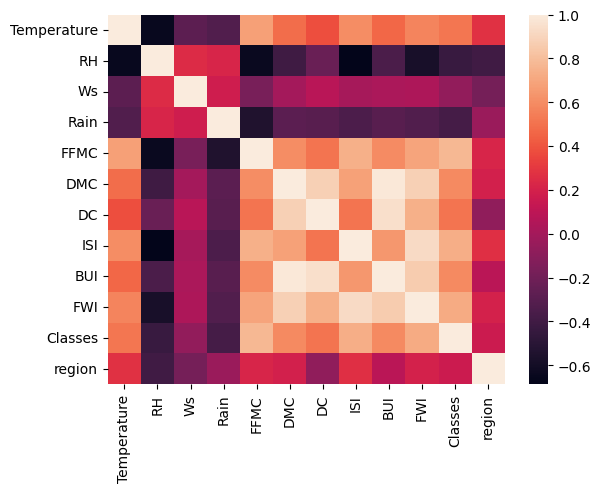

In [36]:
sns.heatmap(df_copy.corr())